# Module 1 Capstone Project 
## 🚀 SpaceX Launch Analysis

## Project Description 
This project analyzes SpaceX launch data to identify trends and patterns regarding the reuse of rocket, success rates, and launch efficiencies. 

## Data Source
SpaceX API Docs - https://docs.spacexdata.com/
API Data used: 
- https://docs.spacexdata.com/#5fc4c846-c373-43df-a10a-e9faf80a8b0a - (API Docs - Launches)
- https://api.spacexdata.com/v3/launches - (API Endpoint - Launches)

## Analysis
The relationship between reusability and launch success.
How specific rocket models and launch sites performed in terms of success rates.
Patterns in launch behavior over the years.

### Key questions:
- How successful are reused rockets and fairings compared to new ones?
- which is the launch success rate of each rocket type?
- Which launch locations have the highest success rates?

---

## 1. Library Imports

In [1]:
# Standard imports
import pandas as pd
import io

# For web scraping
import requests
#import urllib.request
from bs4 import BeautifulSoup

# For performing regex operations
import re

## 2. API Call and parsing to get the JSON Data

In [2]:
# HTTP Request - Get operation to SpaceX API
response = requests.get('https://api.spacexdata.com/v3/launches')

In [3]:
#Validating HTTP 200 - OK - means that we got the response
if response.status_code == 200:
    api_data = response.text
    #Normalize Json into DataFrame
    df = pd.read_json(io.StringIO(api_data), orient='records')
else:
    print("Error getting response from SpaceX API")

In [4]:
#Checking DataFrame Generated
df

,flight_number,mission_name,mission_id,upcoming,launch_year,launch_date_unix,launch_date_utc,launch_date_local,is_tentative,tentative_max_precision,...,static_fire_date_unix,timeline,crew,last_date_update,last_ll_launch_date,last_ll_update,last_wiki_launch_date,last_wiki_revision,last_wiki_update,launch_date_source
0,1,FalconSat,[],False,2006,1143239400,2006-03-24T22:30:00.000Z,2006-03-25T10:30:00+12:00,False,hour,...,1.142554e+09,{'webcast_liftoff': 54},None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,DemoSat,[],False,2007,1174439400,2007-03-21T01:10:00.000Z,2007-03-21T13:10:00+12:00,False,hour,...,NaN,{'webcast_liftoff': 60},None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Trailblazer,[],False,2008,1217734440,2008-08-03T03:34:00.000Z,2008-08-03T15:34:00+12:00,False,hour,...,NaN,{'webcast_liftoff': 14},None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,RatSat,[],False,2008,1222643700,2008-09-28T23:15:00.000Z,2008-09-28T11:15:00+12:00,False,hour,...,1.221869e+09,{'webcast_liftoff': 5},None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,RazakSat,[],False,2009,1247456100,2009-07-13T03:35:00.000Z,2009-07-13T15:35:00+12:00,False,hour,...,NaN,{'webcast_liftoff': 5},None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,107,Crew-1,[EE86F74],False,2020,1605486420,2020-11-16T00:27:00.000Z,2020-11-15T19:27:00-05:00,False,hour,...,NaN,None,[],2020-11-13T21:31:19.000Z,None,None,2020-11-16T00:27:00.000Z,90e9da15-25f7-11eb-badd-0e3a392f3e47,2020-11-13T21:31:19.000Z,wiki
107,108,Sentinel-6 Michael Freilich,[],False,2020,1605979020,2020-11-21T17:17:00.000Z,2020-11-21T09:17:00-08:00,False,hour,...,1.605619e+09,None,None,2020-11-17T19:27:21.000Z,2020-11-21T17:17:00.000Z,2020-11-05T23:48:07.000Z,2020-11-21T17:17:00.000Z,e93220d1-290a-11eb-bd82-0e4885cc0cd7,2020-11-17T19:27:21.000Z,wiki
108,109,Starlink-15 (v1.0),[],False,2020,1603553460,2020-10-24T15:31:00.000Z,2020-10-24T11:31:00-04:00,False,hour,...,1.605976e+09,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,110,CRS-21,[EE86F74],True,2020,1607271420,2020-12-06T16:17:00.000Z,2020-12-06T11:17:00-05:00,False,hour,...,NaN,None,None,2020-12-05T13:04:54.000Z,None,None,2020-12-06T16:17:00.000Z,774e7809-36fa-11eb-a5dc-0e33339b29dd,2020-12-05T13:04:54.000Z,wiki


## 3. Analyse DataFrame info, clean and Data Formatting

In [5]:
#checking null values, etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   flight_number            111 non-null    int64  
 1   mission_name             111 non-null    object 
 2   mission_id               111 non-null    object 
 3   upcoming                 111 non-null    bool   
 4   launch_year              111 non-null    int64  
 5   launch_date_unix         111 non-null    int64  
 6   launch_date_utc          111 non-null    object 
 7   launch_date_local        111 non-null    object 
 8   is_tentative             111 non-null    bool   
 9   tentative_max_precision  111 non-null    object 
 10  tbd                      111 non-null    bool   
 11  launch_window            98 non-null     float64
 12  rocket                   111 non-null    object 
 13  ships                    111 non-null    object 
 14  telemetry                1

In [6]:
#Check rocket column content... I will use just rocket_id / rocket_name and rocket_type
pd.json_normalize(df['rocket'])

,rocket_id,rocket_name,rocket_type,first_stage.cores,second_stage.block,second_stage.payloads,fairings.reused,fairings.recovery_attempt,fairings.recovered,fairings.ship,fairings
0,falcon1,Falcon 1,Merlin A,"[{'core_serial': 'Merlin1A', 'flight': 1, 'blo...",1.0,"[{'payload_id': 'FalconSAT-2', 'norad_id': [],...",False,False,False,None,NaN
1,falcon1,Falcon 1,Merlin A,"[{'core_serial': 'Merlin2A', 'flight': 1, 'blo...",1.0,"[{'payload_id': 'DemoSAT', 'norad_id': [], 're...",False,False,False,None,NaN
2,falcon1,Falcon 1,Merlin C,"[{'core_serial': 'Merlin1C', 'flight': 1, 'blo...",1.0,"[{'payload_id': 'Trailblazer', 'norad_id': [],...",False,False,False,None,NaN
3,falcon1,Falcon 1,Merlin C,"[{'core_serial': 'Merlin2C', 'flight': 1, 'blo...",1.0,"[{'payload_id': 'RatSat', 'norad_id': [33393],...",False,False,False,None,NaN
4,falcon1,Falcon 1,Merlin C,"[{'core_serial': 'Merlin3C', 'flight': 1, 'blo...",1.0,"[{'payload_id': 'RazakSAT', 'norad_id': [35578...",False,False,False,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
106,falcon9,Falcon 9,FT,"[{'core_serial': 'B1061', 'flight': 1, 'block'...",5.0,"[{'payload_id': 'Crew-1', 'norad_id': [46920],...",NaN,NaN,NaN,NaN,NaN
107,falcon9,Falcon 9,FT,"[{'core_serial': 'B1063', 'flight': 1, 'block'...",5.0,"[{'payload_id': 'Sentinel-6 Michael Freilich',...",None,False,None,None,NaN
108,falcon9,Falcon 9,FT,"[{'core_serial': 'B1049', 'flight': 7, 'block'...",5.0,"[{'payload_id': 'Starlink-15', 'norad_id': [],...",False,True,None,GOMSCHIEF,NaN
109,falcon9,Falcon 9,FT,"[{'core_serial': 'B1058', 'flight': 4, 'block'...",5.0,"[{'payload_id': 'CRS-21', 'norad_id': [], 'cap...",NaN,NaN,NaN,NaN,NaN


In [7]:
# Use json_normalize 'rocket' column
rocket_df = pd.json_normalize(df['rocket'])

# Concatenate falt rocket content to the original DataFrame
df = pd.concat([df.drop(columns=['rocket']), rocket_df], axis=1)

In [8]:
#Check rocket column content... I will use just rocket_id / rocket_name and rocket_type
pd.json_normalize(df['launch_site'])

,site_id,site_name,site_name_long
0,kwajalein_atoll,Kwajalein Atoll,Kwajalein Atoll Omelek Island
1,kwajalein_atoll,Kwajalein Atoll,Kwajalein Atoll Omelek Island
2,kwajalein_atoll,Kwajalein Atoll,Kwajalein Atoll Omelek Island
3,kwajalein_atoll,Kwajalein Atoll,Kwajalein Atoll Omelek Island
4,kwajalein_atoll,Kwajalein Atoll,Kwajalein Atoll Omelek Island
...,...,...,...
106,ksc_lc_39a,KSC LC 39A,Kennedy Space Center Historic Launch Complex 39A
107,vafb_slc_4e,VAFB SLC 4E,Vandenberg Air Force Base Space Launch Complex 4E
108,ccafs_slc_40,CCAFS SLC 40,Cape Canaveral Air Force Station Space Launch ...
109,ksc_lc_39a,KSC LC 39A,Kennedy Space Center Historic Launch Complex 39A


In [9]:
# Use json_normalize 'launch_site' column as before we 'Rocket'
launch_site_df = pd.json_normalize(df['launch_site'])

# Concatenate flat lauch_site content to the original DataFrame
df = pd.concat([df.drop(columns=['launch_site']), launch_site_df], axis=1)

In [10]:
#Delete some columns not needed for the analysis
df.drop(columns=['links', 'last_wiki_launch_date', 'last_wiki_revision', 'last_wiki_update', 'launch_date_source',
                'last_date_update','last_ll_launch_date', 'last_ll_update'], inplace=True)

In [11]:
#Checking first_stage.cores to add it in the dataframe
pd.json_normalize(df['first_stage.cores'].explode())

,core_serial,flight,block,gridfins,legs,reused,land_success,landing_intent,landing_type,landing_vehicle
0,Merlin1A,1.0,NaN,False,False,False,None,False,None,None
1,Merlin2A,1.0,NaN,False,False,False,None,False,None,None
2,Merlin1C,1.0,NaN,False,False,False,None,False,None,None
3,Merlin2C,1.0,NaN,False,False,False,None,False,None,None
4,Merlin3C,1.0,NaN,False,False,False,None,False,None,None
...,...,...,...,...,...,...,...,...,...,...
112,B1061,1.0,5.0,True,True,False,True,True,ASDS,OCISLY
113,B1063,1.0,5.0,True,True,False,True,True,RTLS,LZ-4
114,B1049,7.0,5.0,True,True,True,True,True,ASDS,OCISLY
115,B1058,4.0,5.0,True,True,True,None,True,ASDS,None


In [12]:
# Use json_normalize 'first_stages.core' - it would be used to analyse rocket reutilization

#will normalize the whole columns inside json first_stage.cores
first_stage_cores_df = pd.json_normalize(df['first_stage.cores'].explode())

# Concatenate flat  content to the original DataFrame
df = pd.concat([df.drop(columns=['first_stage.cores']), first_stage_cores_df], axis=1)

In [13]:
df.head(10)

,flight_number,mission_name,mission_id,upcoming,launch_year,launch_date_unix,launch_date_utc,launch_date_local,is_tentative,tentative_max_precision,...,core_serial,flight,block,gridfins,legs,reused,land_success,landing_intent,landing_type,landing_vehicle
0,1.0,FalconSat,[],False,2006.0,1.143239e+09,2006-03-24T22:30:00.000Z,2006-03-25T10:30:00+12:00,False,hour,...,Merlin1A,1.0,NaN,False,False,False,None,False,None,None
1,2.0,DemoSat,[],False,2007.0,1.174439e+09,2007-03-21T01:10:00.000Z,2007-03-21T13:10:00+12:00,False,hour,...,Merlin2A,1.0,NaN,False,False,False,None,False,None,None
2,3.0,Trailblazer,[],False,2008.0,1.217734e+09,2008-08-03T03:34:00.000Z,2008-08-03T15:34:00+12:00,False,hour,...,Merlin1C,1.0,NaN,False,False,False,None,False,None,None
3,4.0,RatSat,[],False,2008.0,1.222644e+09,2008-09-28T23:15:00.000Z,2008-09-28T11:15:00+12:00,False,hour,...,Merlin2C,1.0,NaN,False,False,False,None,False,None,None
4,5.0,RazakSat,[],False,2009.0,1.247456e+09,2009-07-13T03:35:00.000Z,2009-07-13T15:35:00+12:00,False,hour,...,Merlin3C,1.0,NaN,False,False,False,None,False,None,None
5,6.0,Falcon 9 Test Flight,[EE86F74],False,2010.0,1.275677e+09,2010-06-04T18:45:00.000Z,2010-06-04T14:45:00-04:00,False,hour,...,B0003,1.0,1.0,False,False,False,None,False,None,None
6,7.0,COTS 1,[EE86F74],False,2010.0,1.291823e+09,2010-12-08T15:43:00.000Z,2010-12-08T11:43:00-04:00,False,hour,...,B0004,1.0,1.0,False,False,False,None,False,None,None
7,8.0,COTS 2,[EE86F74],False,2012.0,1.335945e+09,2012-05-22T07:44:00.000Z,2012-05-22T03:44:00-04:00,False,hour,...,B0005,1.0,1.0,False,False,False,None,False,None,None
8,9.0,CRS-1,[EE86F74],False,2012.0,1.349656e+09,2012-10-08T00:35:00.000Z,2012-10-08T20:35:00-04:00,False,hour,...,B0006,1.0,1.0,False,False,False,None,False,None,None
9,10.0,CRS-2,[EE86F74],False,2013.0,1.362165e+09,2013-03-01T19:10:00.000Z,2013-03-01T15:10:00-04:00,False,hour,...,B0007,1.0,1.0,False,False,False,None,False,None,None


In [14]:
#Will change the column 'launch_date_utc' and split it into 2 columns 'launch_date' 'launch_time'
#actual format example '2006-03-24T22:30:00.000Z' 
df['launch_date_utc'] = pd.to_datetime(df['launch_date_utc'], format='%Y-%m-%dT%H:%M:%S.%fZ')
df['launch_date'] = df['launch_date_utc'].dt.strftime('%Y-%m-%d')
df['launch_time'] = df['launch_date_utc'].dt.strftime('%H:%M:%S')

#Finally - delete launch_date_utc
df.drop(columns='launch_date_utc', inplace=True)

## 4. Data Graphics and answer to key questions

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 45 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   flight_number              111 non-null    float64
 1   mission_name               111 non-null    object 
 2   mission_id                 111 non-null    object 
 3   upcoming                   111 non-null    object 
 4   launch_year                111 non-null    float64
 5   launch_date_unix           111 non-null    float64
 6   launch_date_local          111 non-null    object 
 7   is_tentative               111 non-null    object 
 8   tentative_max_precision    111 non-null    object 
 9   tbd                        111 non-null    object 
 10  launch_window              98 non-null     float64
 11  ships                      111 non-null    object 
 12  telemetry                  111 non-null    object 
 13  launch_success             108 non-null    float64

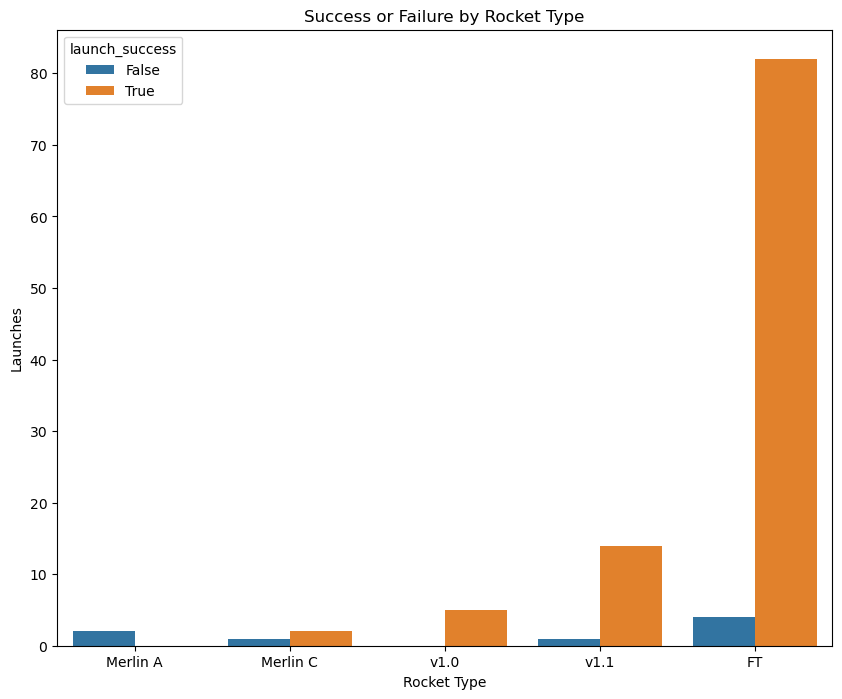

In [16]:
#Check succesfull Launches 

import seaborn as sns
import matplotlib.pyplot as plt

df['launch_success'] = df['launch_success'].fillna(0)
df['launch_success'] = df['launch_success'].astype(bool)

#Will be checking if there is a relation btw rocket type and launch success
plt.figure(figsize=(10,8))
sns.countplot(data=df, x='rocket_type', hue='launch_success')
plt.title('Success or Failure by Rocket Type')
plt.xlabel('Rocket Type')
plt.ylabel('Launches')
plt.show()


In [17]:
# Something very important and because I follow SpaceX... the concept of rocket retutilization is a game changer in the 
# AeroSpace field.
# So below I will be analysing how many launches reused rockets and what impact they had on the success of the launches

#define function to reuse it and rename true to reused and false to not reused String
def reuse_status(value):
    if value == 'True':
        return 'reused'
    else:
        return 'not reused'

df['first_stage_reused'] = df['reused'].apply(reuse_status)
df['first_stage_reused'] = df['first_stage_reused'].fillna('not reused')

df['fairings_reused'] = df['fairings.reused'].fillna('not reused') #values with NaN so will force there not reused
df['fairings_reused'] = df['fairings.reused'].apply(reuse_status)
df['fairings_reused'] = df['fairings_reused'].fillna('not reused')

df['launch_success'] = df['launch_success'].fillna('False')

#checking the info
print(df[['first_stage_reused', 'fairings_reused', 'launch_success']].head(10))
print(df[['first_stage_reused', 'fairings_reused', 'launch_success']].tail(10))


  first_stage_reused fairings_reused  launch_success
0         not reused      not reused           False
1         not reused      not reused           False
2         not reused      not reused           False
3         not reused      not reused            True
4         not reused      not reused            True
5         not reused      not reused            True
6         not reused      not reused            True
7         not reused      not reused            True
8         not reused      not reused            True
9         not reused      not reused            True
    first_stage_reused fairings_reused  launch_success
107         not reused      not reused            True
108         not reused      not reused            True
109         not reused      not reused           False
110         not reused      not reused           False
111         not reused      not reused           False
112         not reused      not reused           False
113         not reused      not 

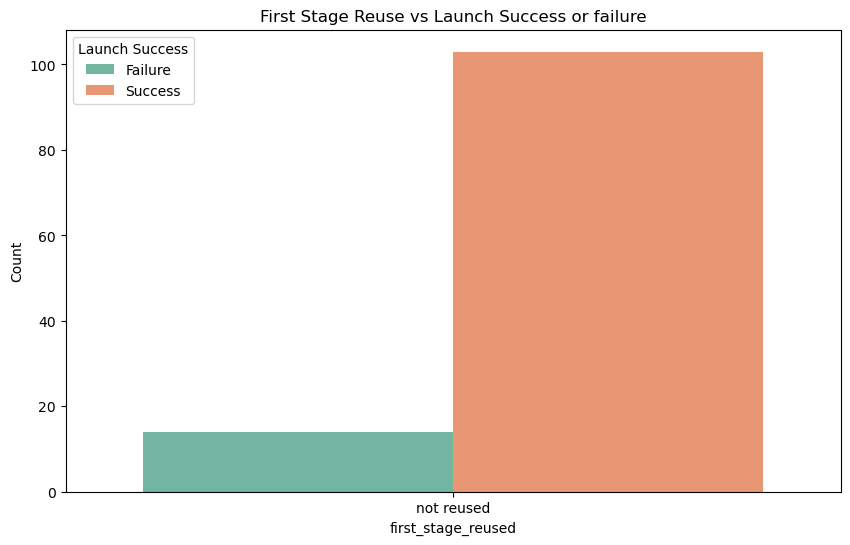

In [18]:
# First Stage Reutilization

plt.figure(figsize=(10, 6))

sns.countplot(data=df, x='first_stage_reused', hue='launch_success', palette='Set2')

plt.title('First Stage Reuse vs Launch Success or failure')
#plt.xlabel('First Stage Reuse')
plt.ylabel('Count')
plt.legend(title='Launch Success', labels=['Failure', 'Success'])
plt.show()

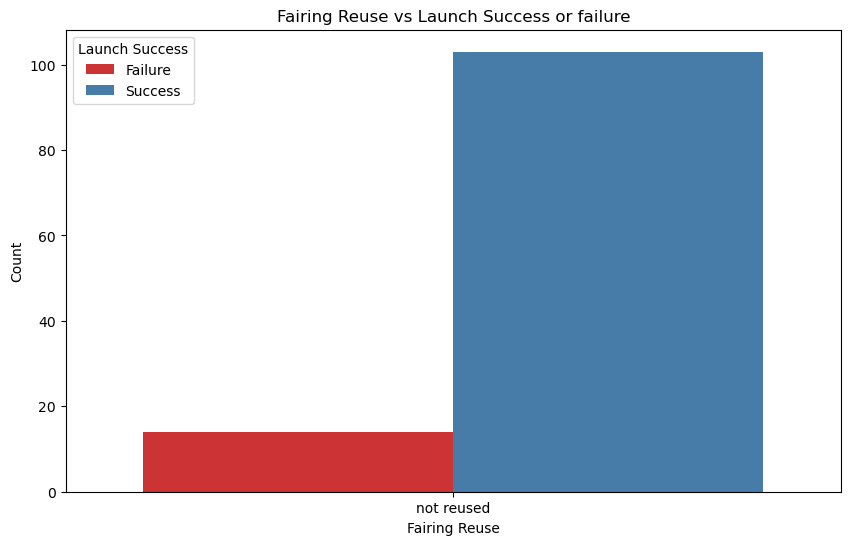

In [19]:
# Fairing reuse 
plt.figure(figsize=(10, 6))

sns.countplot(data=df, x='fairings_reused', hue='launch_success', palette='Set1')

plt.title('Fairing Reuse vs Launch Success or failure')
plt.xlabel('Fairing Reuse')
plt.ylabel('Count')
plt.legend(title='Launch Success', labels=['Failure', 'Success'])
plt.show()

In [20]:
#% Mean by first stage reused and fairings reused

reuse_success_rate   =  df.groupby('first_stage_reused')['launch_success'].mean()

fairing_success_rate = df.groupby('fairings_reused')['launch_success'].mean()

type(reuse_success_rate)
print("% of Success Proportion by First Stage Reuse: ")
print(reuse_success_rate)

print("% of Success Proportion by Fairing Reuse: ")
print(fairing_success_rate)

% of Success Proportion by First Stage Reuse: 
first_stage_reused
not reused    0.880342
Name: launch_success, dtype: float64
% of Success Proportion by Fairing Reuse: 
fairings_reused
not reused    0.880342
Name: launch_success, dtype: float64


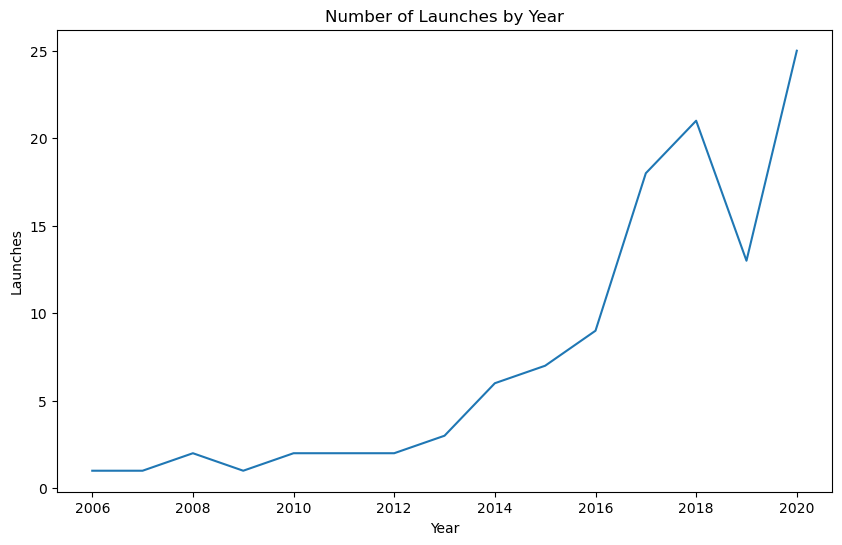

In [21]:
# Launches by Year
launch_years = df['launch_year'].value_counts().sort_index()

plt.figure(figsize=(10,6))

sns.lineplot(x=launch_years.index, y=launch_years.values)

plt.title('Number of Launches by Year')
plt.xlabel('Year')
plt.ylabel('Launches')
plt.show()

In [39]:
# Success rate by rocket type
rocket_success_rate = df[df['launch_success'] == True].groupby('rocket_name').size() / df.groupby('rocket_name').size()

# Success rate by launch site
location_success_rate = df[df['launch_success'] == True].groupby('site_name_long').size() / df.groupby('site_name_long').size()

print("Success Rate by Rocket Type:")
print("---------------------------")
print(rocket_success_rate)

print("-------------------------------------------------------------------------------------------------------------------------")

print("Success Rate by Launch Location:")
print("-------------------------------")
print(location_success_rate)

Success Rate by Rocket Type:
---------------------------
rocket_name
Falcon 1        0.400000
Falcon 9        0.951456
Falcon Heavy    1.000000
dtype: float64
-------------------------------------------------------------------------------------------------------------------------
Success Rate by Launch Location:
-------------------------------
site_name_long
Cape Canaveral Air Force Station Space Launch Complex 40    0.951613
Kennedy Space Center Historic Launch Complex 39A            0.928571
Kwajalein Atoll Omelek Island                               0.400000
Vandenberg Air Force Base Space Launch Complex 4E           1.000000
dtype: float64


C:\Users\szmaj\AppData\Local\Temp\ipykernel_29904\1417015285.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rocket_success_rate.index, y=rocket_success_rate.values, palette='pastel')


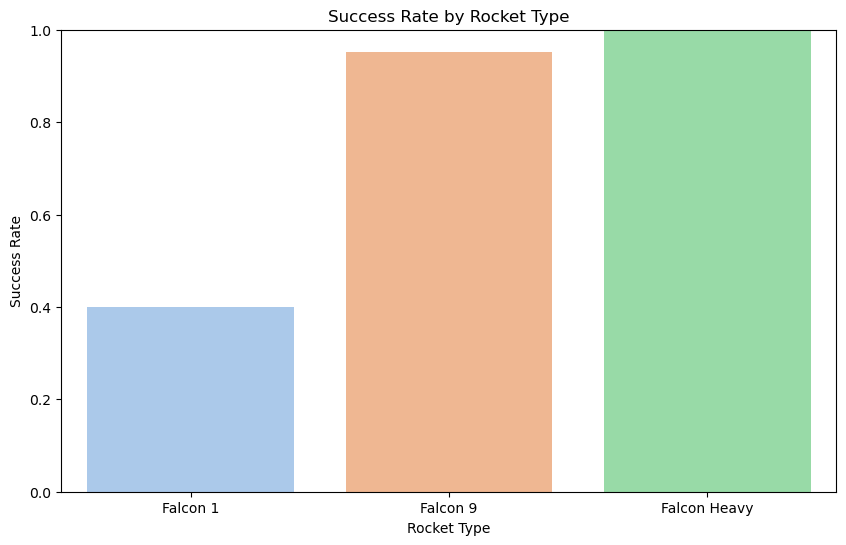

In [44]:
# Success rate by rocket type
plt.figure(figsize=(10, 6))

sns.barplot(x=rocket_success_rate.index, y=rocket_success_rate.values, palette='pastel')

plt.title("Success Rate by Rocket Type")
plt.xlabel("Rocket Type")
plt.ylabel("Success Rate")
plt.ylim(0, 1)  

plt.show()

C:\Users\szmaj\AppData\Local\Temp\ipykernel_29904\3032491821.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_success_rate.index, y=location_success_rate.values, palette='coolwarm')


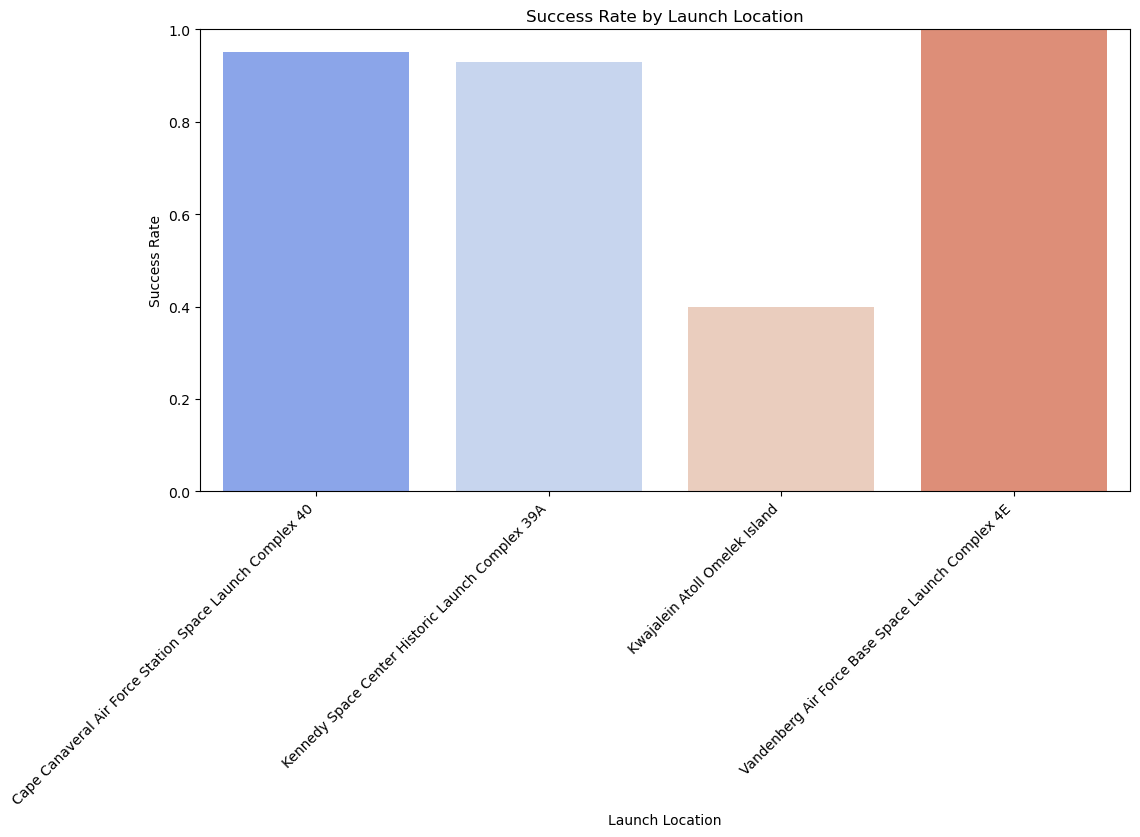

In [49]:
#success rate by launch location
plt.figure(figsize=(12, 6))

sns.barplot(x=location_success_rate.index, y=location_success_rate.values, palette='coolwarm')

plt.title("Success Rate by Launch Location")
plt.xlabel("Launch Location")
plt.ylabel("Success Rate")
plt.ylim(0, 1)  
plt.xticks(rotation=45, ha='right')

plt.show()